# Algoritmo de bisección

### Función de prueba

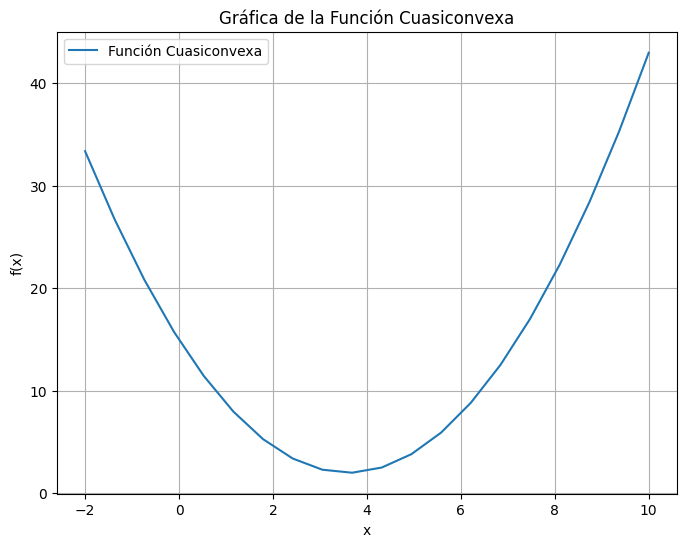

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  return ((x-3.6)**2) +2

#Graficar función
# Generar valores de x
x_values = np.linspace(-2, 10, 20)

# Calcular los valores correspondientes de y utilizando la función quasiconvex_function
y_values = [quasiconvex_function(x) for x in x_values]

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa')
plt.title('Gráfica de la Función Cuasiconvexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

### Desarrollo del algoritmo

In [2]:
# inicializar intervalo
a = -3
b = 6

# tolerancia
l = 0.5

# derivada numerica
def derivative(f, x, h=1e-5):
   return (f(x + h) - f(x - h)) / (2 * h)

# Calcular numero de interaciones
n = int(np.ceil(np.log2((b-a)/l)))
print("Número de iteraciones necesarias:", n)

# Algoritmo de bisección
while (b - a) > l:
   lambda_1 = (a + b)/2
   
   # Evaluar derivada en lambda_1
   d_lambda_1 = derivative(quasiconvex_function, lambda_1)
   print(f"Iteración: a={a:.4f}, b={b:.4f}, λ1={lambda_1:.4f}, derivada={d_lambda_1:.4f}")
   
   if d_lambda_1 > 0:
      b = lambda_1
   elif d_lambda_1 < 0:
      a = lambda_1
   else:
      print("Se encontró el mínimo exacto en λ1:", lambda_1)
      break

print(f"Resultado final: a={a:.4f}, b={b:.4f}")
print(f"Mínimo aproximado en: {(a+b)/2:.4f}")


Número de iteraciones necesarias: 5
Iteración: a=-3.0000, b=6.0000, λ1=1.5000, derivada=-4.2000
Iteración: a=1.5000, b=6.0000, λ1=3.7500, derivada=0.3000
Iteración: a=1.5000, b=3.7500, λ1=2.6250, derivada=-1.9500
Iteración: a=2.6250, b=3.7500, λ1=3.1875, derivada=-0.8250
Iteración: a=3.1875, b=3.7500, λ1=3.4688, derivada=-0.2625
Resultado final: a=3.4688, b=3.7500
Mínimo aproximado en: 3.6094


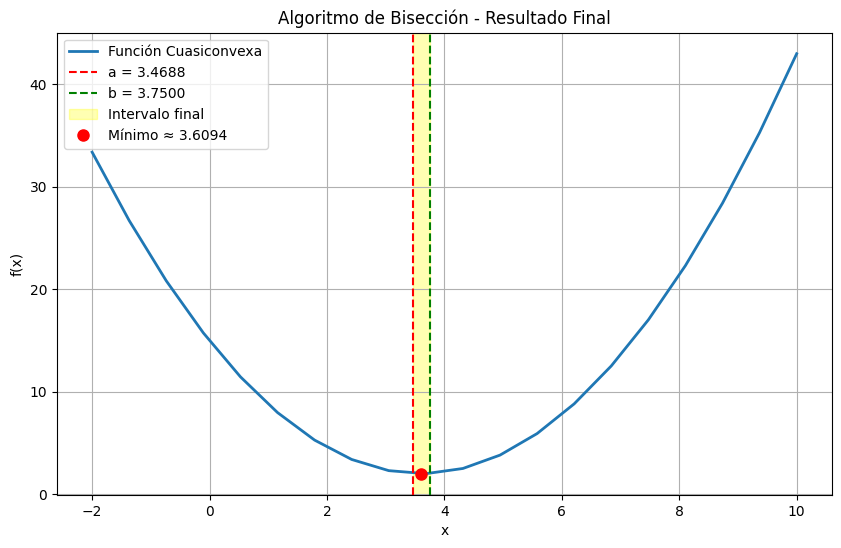

In [3]:
# Graficar la función original y marcar el intervalo final
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa', linewidth=2)

# Marcar el intervalo final
plt.axvline(x=a, color='red', linestyle='--', label=f'a = {a:.4f}')
plt.axvline(x=b, color='green', linestyle='--', label=f'b = {b:.4f}')
plt.axvspan(a, b, alpha=0.3, color='yellow', label='Intervalo final')

# Marcar el punto mínimo aproximado
min_approx = (a + b) / 2
plt.plot(min_approx, quasiconvex_function(min_approx), 'ro', markersize=8, label=f'Mínimo ≈ {min_approx:.4f}')

plt.title('Algoritmo de Bisección - Resultado Final')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

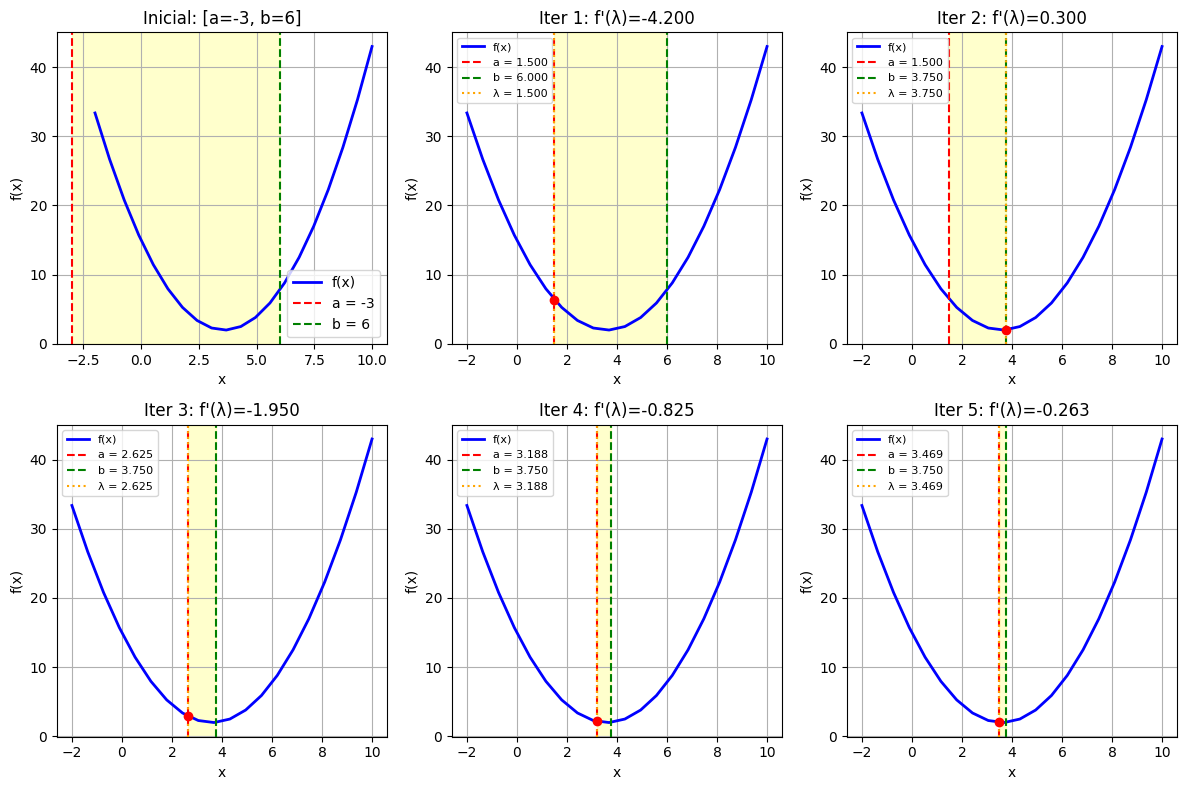

Resumen de iteraciones:
--------------------------------------------------------------------------------
Iter   a          b          λ1         f'(λ1)       Acción
--------------------------------------------------------------------------------
1      -3.0000    6.0000     1.5000     -4.2000      a = λ1
2      1.5000     6.0000     3.7500     0.3000       b = λ1
3      1.5000     3.7500     2.6250     -1.9500      a = λ1
4      2.6250     3.7500     3.1875     -0.8250      a = λ1
5      3.1875     3.7500     3.4688     -0.2625      a = λ1


In [4]:
# Función para crear visualización paso a paso del algoritmo de bisección
def bisection_step_by_step():
    # Reinicializar variables para la demostración paso a paso
    a_step = -3
    b_step = 6
    iteration = 0
    
    # Crear figura inicial
    plt.figure(figsize=(12, 8))
    
    # Mostrar estado inicial
    plt.subplot(2, 3, 1)
    plt.plot(x_values, y_values, 'b-', linewidth=2, label='f(x)')
    plt.axvline(x=a_step, color='red', linestyle='--', label=f'a = {a_step}')
    plt.axvline(x=b_step, color='green', linestyle='--', label=f'b = {b_step}')
    plt.axvspan(a_step, b_step, alpha=0.2, color='yellow')
    plt.title(f'Inicial: [a={a_step}, b={b_step}]')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    
    # Realizar iteraciones paso a paso
    steps_data = []
    
    while (b_step - a_step) > l and iteration < 5:  # Limitar a 5 iteraciones para visualización
        lambda_1_step = (a_step + b_step) / 2
        d_lambda_1_step = derivative(quasiconvex_function, lambda_1_step)
        
        # Guardar datos del paso
        steps_data.append({
            'iteration': iteration + 1,
            'a': a_step,
            'b': b_step,
            'lambda_1': lambda_1_step,
            'derivative': d_lambda_1_step
        })
        
        # Actualizar intervalo
        if d_lambda_1_step > 0:
            b_step = lambda_1_step
        elif d_lambda_1_step < 0:
            a_step = lambda_1_step
        
        # Crear subplot para esta iteración
        plt.subplot(2, 3, iteration + 2)
        plt.plot(x_values, y_values, 'b-', linewidth=2, label='f(x)')
        plt.axvline(x=a_step, color='red', linestyle='--', label=f'a = {a_step:.3f}')
        plt.axvline(x=b_step, color='green', linestyle='--', label=f'b = {b_step:.3f}')
        plt.axvline(x=lambda_1_step, color='orange', linestyle=':', label=f'λ = {lambda_1_step:.3f}')
        plt.axvspan(a_step, b_step, alpha=0.2, color='yellow')
        plt.plot(lambda_1_step, quasiconvex_function(lambda_1_step), 'ro', markersize=6)
        plt.title(f'Iter {iteration + 1}: f\'(λ)={d_lambda_1_step:.3f}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend(fontsize=8)
        
        iteration += 1
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla de resultados
    print("Resumen de iteraciones:")
    print("-" * 80)
    print(f"{'Iter':<6} {'a':<10} {'b':<10} {'λ1':<10} {'f\'(λ1)':<12} {'Acción'}")
    print("-" * 80)
    
    for step in steps_data:
        action = "b = λ1" if step['derivative'] > 0 else "a = λ1"
        print(f"{step['iteration']:<6} {step['a']:<10.4f} {step['b']:<10.4f} {step['lambda_1']:<10.4f} {step['derivative']:<12.4f} {action}")

# Ejecutar la visualización paso a paso
bisection_step_by_step()